In [1]:
#!pip install mediapipe

In [2]:
#Modelo pre-entrenado
import mediapipe as mp
#Lector de imágenes
import cv2
#Manejo de datos
import numpy as np
#Lector de direcciones
import os

#Mezcla
from sklearn.utils import shuffle
#División de datos
from sklearn.model_selection import train_test_split
#Modelo a entrenar
from sklearn.neighbors import KNeighborsClassifier
#Captura de resultados
from sklearn import metrics

#Impresión de tablas
import matplotlib.pyplot as plt

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

In [3]:
def get_param(Class):
    with mp_hands.Hands(
        static_image_mode=True,
        max_num_hands=2,
        min_detection_confidence=0.5) as hands:
        data=[]
        for idx, file in enumerate(os.listdir(Class)):
            # Read an image, flip it around y-axis for correct handedness output (see
            # above).
            image = cv2.flip(cv2.imread(os.path.join(Class,file)), 1)
            # Convert the BGR image to RGB before processing.
            results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

            if not results.multi_hand_landmarks:
                continue
            image_height, image_width, _ = image.shape
            annotated_image = image.copy()

            for hand_landmarks in results.multi_hand_landmarks:
                points=[]
                points.append(hand_landmarks.landmark[mp_hands.HandLandmark.WRIST])

                points.append(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC])
                points.append(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP])
                points.append(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP])
                points.append(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP])

                points.append(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP])
                points.append(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP])
                points.append(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP])
                points.append(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP])

                points.append(hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP])
                points.append(hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP])
                points.append(hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP])
                points.append(hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP])

                points.append(hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP])
                points.append(hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP])
                points.append(hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP])
                points.append(hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP])

                points.append(hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP])
                points.append(hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP])
                points.append(hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP])
                points.append(hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP])

                coor=[]
                for i in enumerate(points):
                    coor.append(i[1].x)
                    coor.append(i[1].y)
                    coor.append(i[1].z)
                data.append([coor,Class])
    return data

In [4]:
def xy_capture(data):
    X=[]
    Y=[]
    for features,labels in data:
        X.append(features)
        Y.append(labels)
    return X,Y

In [6]:
#Captura de características
dataa = get_param('A')
datae = get_param('E')
datai = get_param('I')
datao = get_param('O')
datau = get_param('U')

#Unión y mezcla de datos
data=np.concatenate((dataa,datae,datai,datao,datau))
data = shuffle(data)

#Separación de datos
train_data,test_data = train_test_split(data, test_size=0.2)
X_train,Y_train = xy_capture(train_data)
X_test,Y_test = xy_capture(test_data)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [7]:
#para matrix de confusion
from sklearn.metrics import confusion_matrix

#para muestra de matrix de confusion
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

Classification report for classifier KNeighborsClassifier(n_neighbors=7):
              precision    recall  f1-score   support

           A       0.99      0.99      0.99       134
           E       0.99      0.99      0.99       161
           I       0.98      0.98      0.98       156
           O       0.99      1.00      1.00       162
           U       0.99      1.00      1.00       163

    accuracy                           0.99       776
   macro avg       0.99      0.99      0.99       776
weighted avg       0.99      0.99      0.99       776




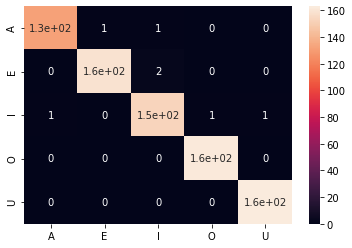

In [8]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, Y_train)
predicted_knn = model.predict(X_test)

#Resultados
print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(Y_test, predicted_knn)}\n"
)

arr = confusion_matrix(Y_test, predicted_knn)

df_cm = pd.DataFrame(arr, index = [i for i in "AEIOU"],columns = [i for i in "AEIOU"])
plt.figure(figsize = (6,4))
sn.heatmap(df_cm, annot=True)
plt.show()